In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from align import *
from scores import *
from plot import *


In [99]:
! python -V

Python 3.7.7


In [69]:
np.__version__, pd.__version__, sns.__version__

('1.21.5', '1.3.5', '0.12.2')

In [71]:
import matplotlib as mpl

mpl.__version__

'3.5.3'

In [20]:
#import importlib

# Calculate the MARE, Beta_imp from the LooDosage of Minimac4

Using the TOPMed imputed 1KG as example.

In [5]:
vid, beta, mare = mare_beta_hap("../../data/chr19.empiricalDose.vcf.gz")

### MARE and Beta_imp from haploid data ###


In [6]:
len(vid), len(beta), len(mare)

(9126, 9126, 9126)

## Combine the MARE and Beta_imp with Rsq, EmpRsq, etc

This is a sample dataset by submiting the 504 1KGP-EAS samples to the TOPMed server.

In [8]:
# will remove all NA, not recommended
info = pd.read_table("../data/chr19.info.gz", na_values="-").dropna() 

# will excetly get the Array marker, recommended
#info = pd.read_table("../data/chr19.info.gz")
#info = info[info["Genotyped"]=="Genotyped"]

In [10]:
df = pd.DataFrame()

df.index=vid
df["mare"] = mare
df["beta"] = beta

In [11]:
df

mare      beta
chr19:247265:G:T    0.196920  0.711758
chr19:267213:C:T    0.209272  0.636202
chr19:277717:G:A    0.171831  0.876945
chr19:280299:T:C    0.116043  0.861835
chr19:288374:T:C    0.103638  0.791133
...                      ...       ...
chr19:58557986:T:C  0.274893  0.742177
chr19:58564164:G:A  0.287427  0.492038
chr19:58571001:C:T  0.010087  0.988846
chr19:58576112:G:A  0.043225  0.958558
chr19:58578425:C:T  0.020232  0.978492

[9126 rows x 2 columns]

In [12]:
info

SNP REF(0) ALT(1)  ALT_Frq      MAF  AvgCall      Rsq  \
705        chr19:247265:G:T      G      T  0.05241  0.05241  0.99978  0.99629   
1317       chr19:267213:C:T      C      T  0.12344  0.12344  0.99762  0.97869   
1666       chr19:277717:G:A      G      A  0.08637  0.08637  0.99793  0.98068   
1796       chr19:280299:T:C      T      C  0.17246  0.17246  0.99781  0.98831   
2136       chr19:288374:T:C      T      C  0.14090  0.14090  0.99933  0.99457   
...                     ...    ...    ...      ...      ...      ...      ...   
2267514  chr19:58557986:T:C      T      C  0.79337  0.20663  0.99556  0.97506   
2267725  chr19:58564164:G:A      G      A  0.02185  0.02185  0.99991  0.99602   
2267964  chr19:58571001:C:T      C      T  0.10812  0.10812  0.99997  0.99971   
2268156  chr19:58576112:G:A      G      A  0.11051  0.11051  0.99960  0.99600   
2268239  chr19:58578425:C:T      C      T  0.10821  0.10821  0.99967  0.99720   

         Genotyped  LooRsq   EmpR   EmpRsq    Dose0    Dose1  
705      Genotyped   0.857  0.878  0.77146  0.71386  0.00233  
1317     Genotyped   0.461  0.739  0.54559  0.78030  0.14412  
1666     Genotyped   0.828  0.890  0.79230  0.90371  0.02669  
1796     Genotyped   0.828  0.927  0.85990  0.89535  0.03354  
2136     Genotyped   0.677  0.920  0.84685  0.83647  0.04534  
...            ...     ...    ...      ...      ...      ...  
2267514  Genotyped   0.749  0.796  0.63324  0.89991  0.15780  
2267725  Genotyped   0.628  0.737  0.54270  0.49664  0.00466  
2267964  Genotyped   0.990  0.995  0.98982  0.98979  0.00099  
2268156  Genotyped   0.775  0.972  0.94427  0.99657  0.03809  
2268239  Genotyped   0.994  0.990  0.97967  0.97845  0.00024  

[9096 rows x 13 columns]

In [14]:
newdf = df.merge(info, how="inner", left_index=True, right_on="SNP")

In [15]:
newdf

mare      beta                 SNP REF(0) ALT(1)  ALT_Frq  \
705      0.196920  0.711758    chr19:247265:G:T      G      T  0.05241   
1317     0.209272  0.636202    chr19:267213:C:T      C      T  0.12344   
1666     0.171831  0.876945    chr19:277717:G:A      G      A  0.08637   
1796     0.116043  0.861835    chr19:280299:T:C      T      C  0.17246   
2136     0.103638  0.791133    chr19:288374:T:C      T      C  0.14090   
...           ...       ...                 ...    ...    ...      ...   
2267514  0.274893  0.742177  chr19:58557986:T:C      T      C  0.79337   
2267725  0.287427  0.492038  chr19:58564164:G:A      G      A  0.02185   
2267964  0.010087  0.988846  chr19:58571001:C:T      C      T  0.10812   
2268156  0.043225  0.958558  chr19:58576112:G:A      G      A  0.11051   
2268239  0.020232  0.978492  chr19:58578425:C:T      C      T  0.10821   

             MAF  AvgCall      Rsq  Genotyped  LooRsq   EmpR   EmpRsq  \
705      0.05241  0.99978  0.99629  Genotyped   0.857  0.878  0.77146   
1317     0.12344  0.99762  0.97869  Genotyped   0.461  0.739  0.54559   
1666     0.08637  0.99793  0.98068  Genotyped   0.828  0.890  0.79230   
1796     0.17246  0.99781  0.98831  Genotyped   0.828  0.927  0.85990   
2136     0.14090  0.99933  0.99457  Genotyped   0.677  0.920  0.84685   
...          ...      ...      ...        ...     ...    ...      ...   
2267514  0.20663  0.99556  0.97506  Genotyped   0.749  0.796  0.63324   
2267725  0.02185  0.99991  0.99602  Genotyped   0.628  0.737  0.54270   
2267964  0.10812  0.99997  0.99971  Genotyped   0.990  0.995  0.98982   
2268156  0.11051  0.99960  0.99600  Genotyped   0.775  0.972  0.94427   
2268239  0.10821  0.99967  0.99720  Genotyped   0.994  0.990  0.97967   

           Dose0    Dose1  
705      0.71386  0.00233  
1317     0.78030  0.14412  
1666     0.90371  0.02669  
1796     0.89535  0.03354  
2136     0.83647  0.04534  
...          ...      ...  
2267514  0.89991  0.15780  
2267725  0.49664  0.00466  
2267964  0.98979  0.00099  
2268156  0.99657  0.03809  
2268239  0.97845  0.00024  

[9096 rows x 15 columns]

# Plot the MARE ~ Rsq

NOTE: LooRsq is according to the leave-one-variant-out, Rsq is according to using all markers on array.

In case LooDosage is used, LooRsq should be specified.

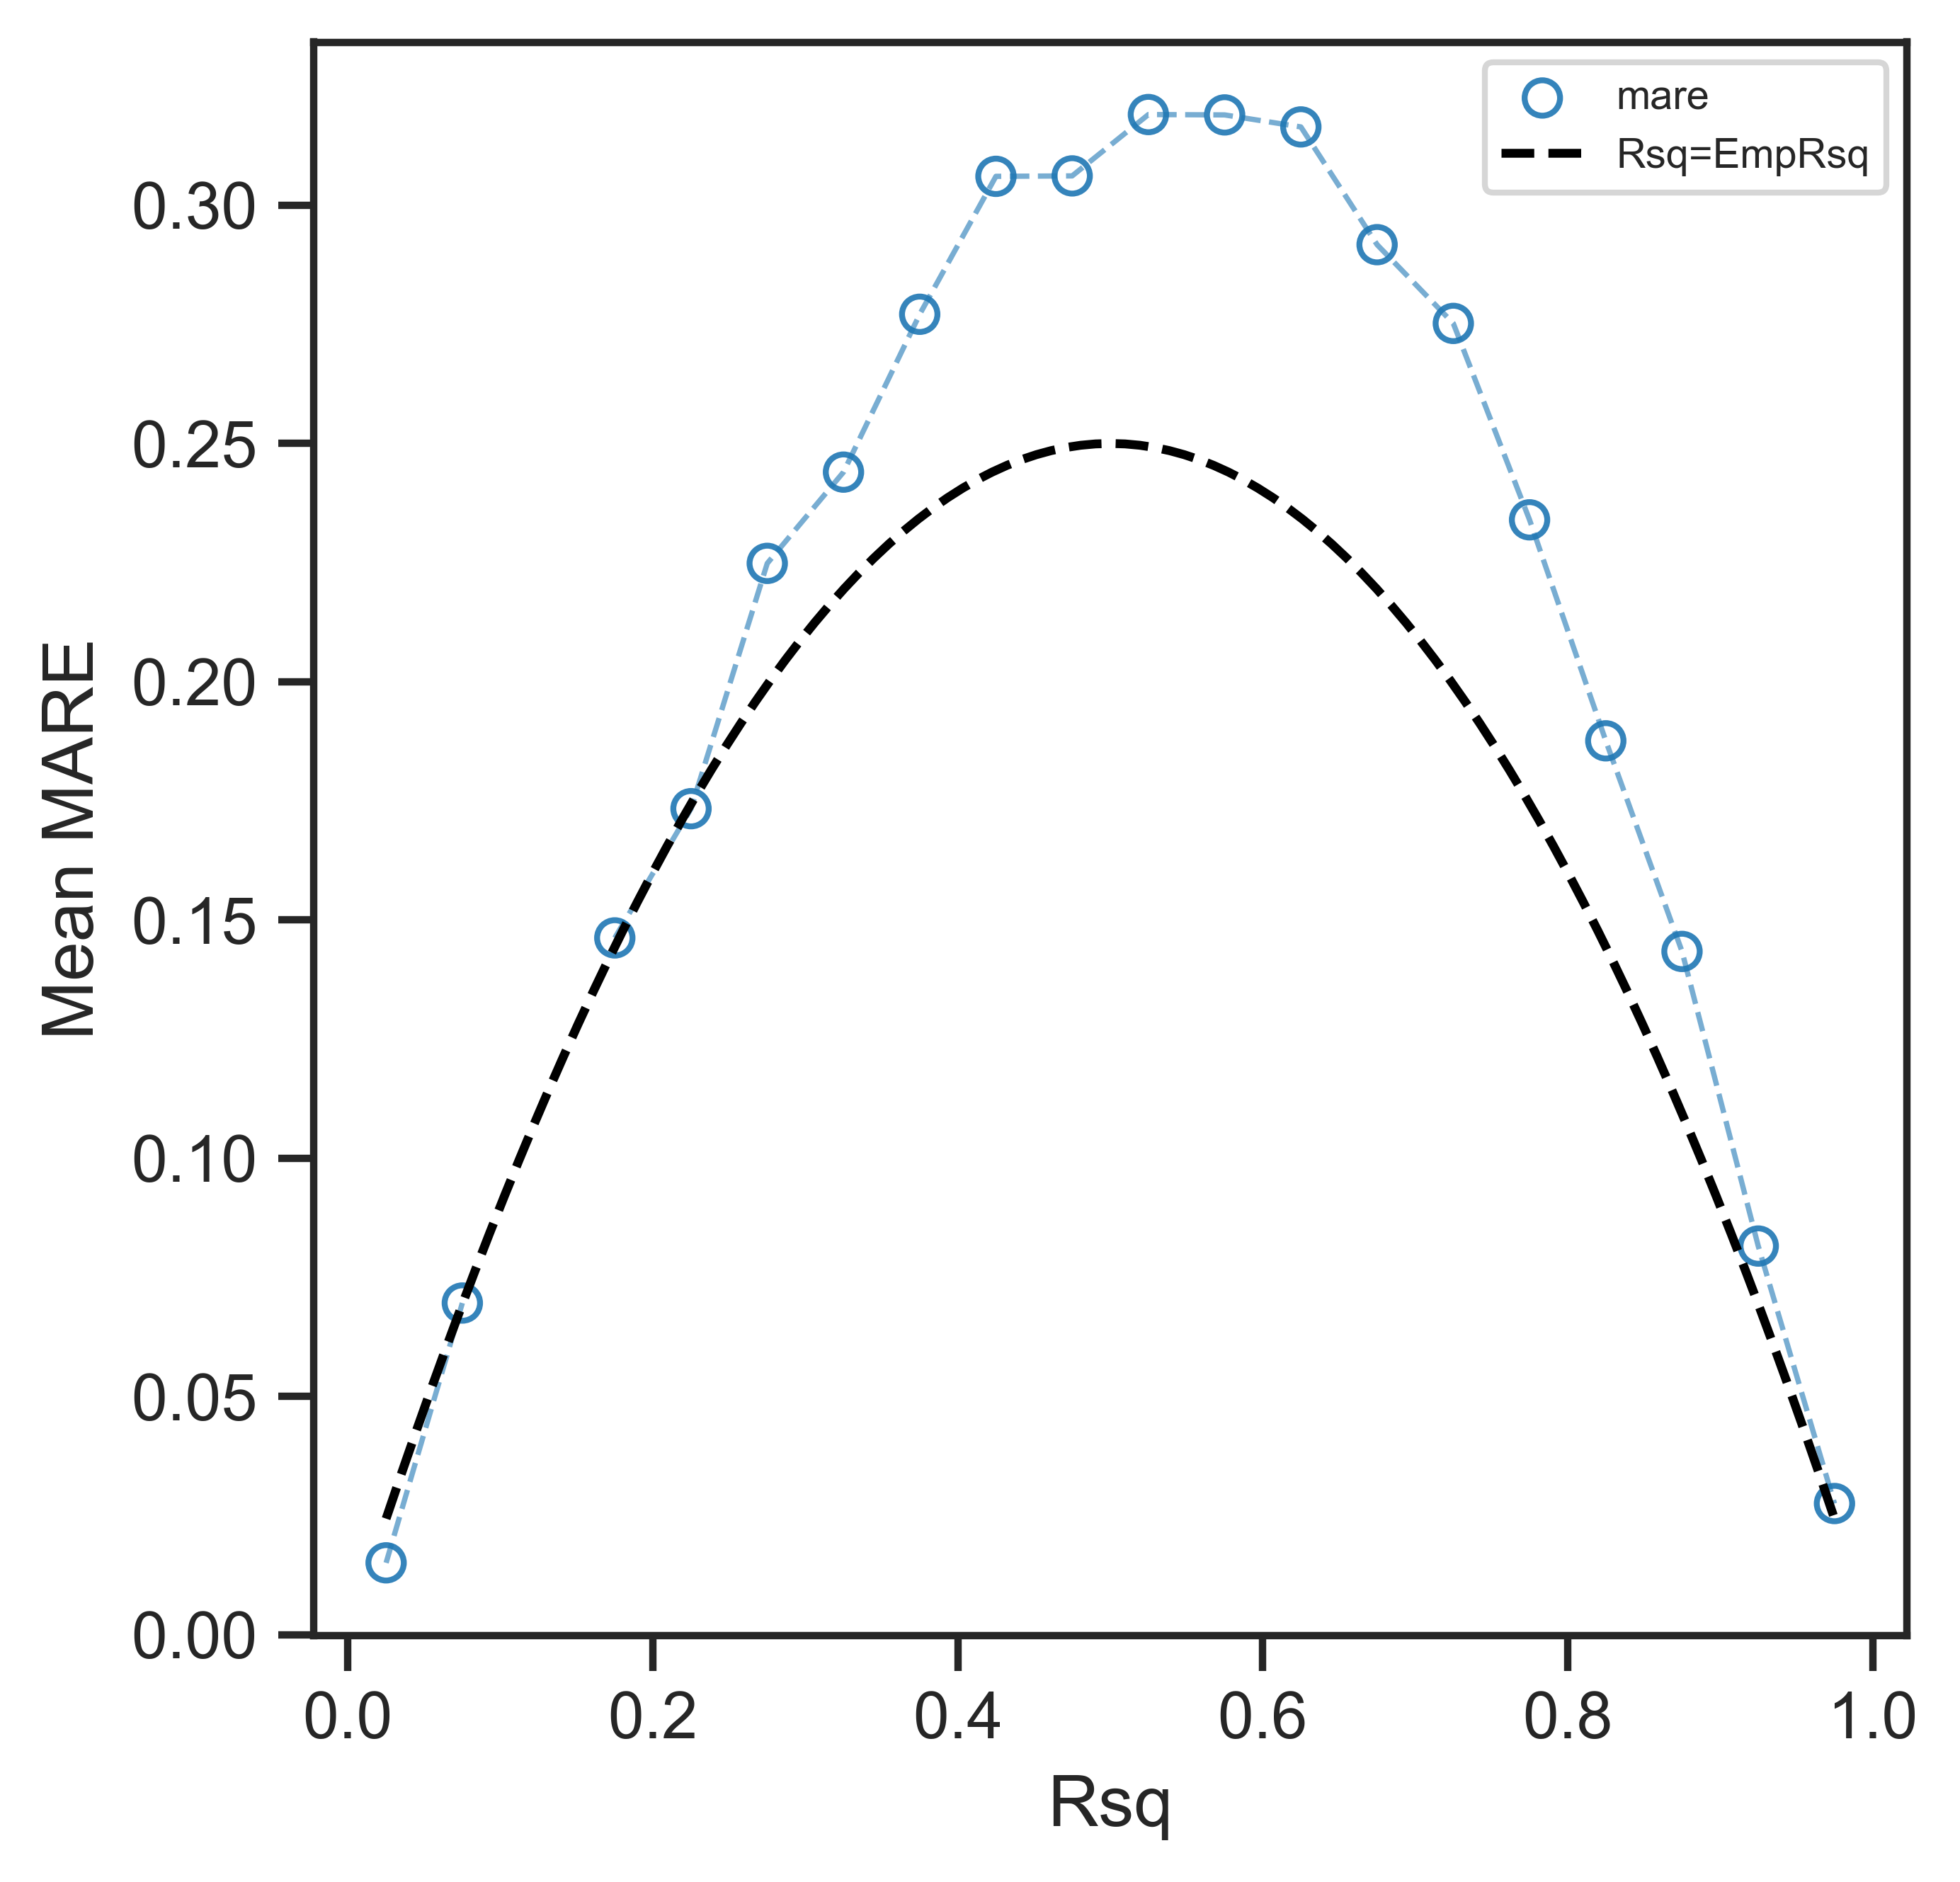

In [45]:
fig = plot_MARE(newdf, marecol="mare", Rsqcol="LooRsq", filename=None)

# Plot the Beta_imp ~ EmpRsq

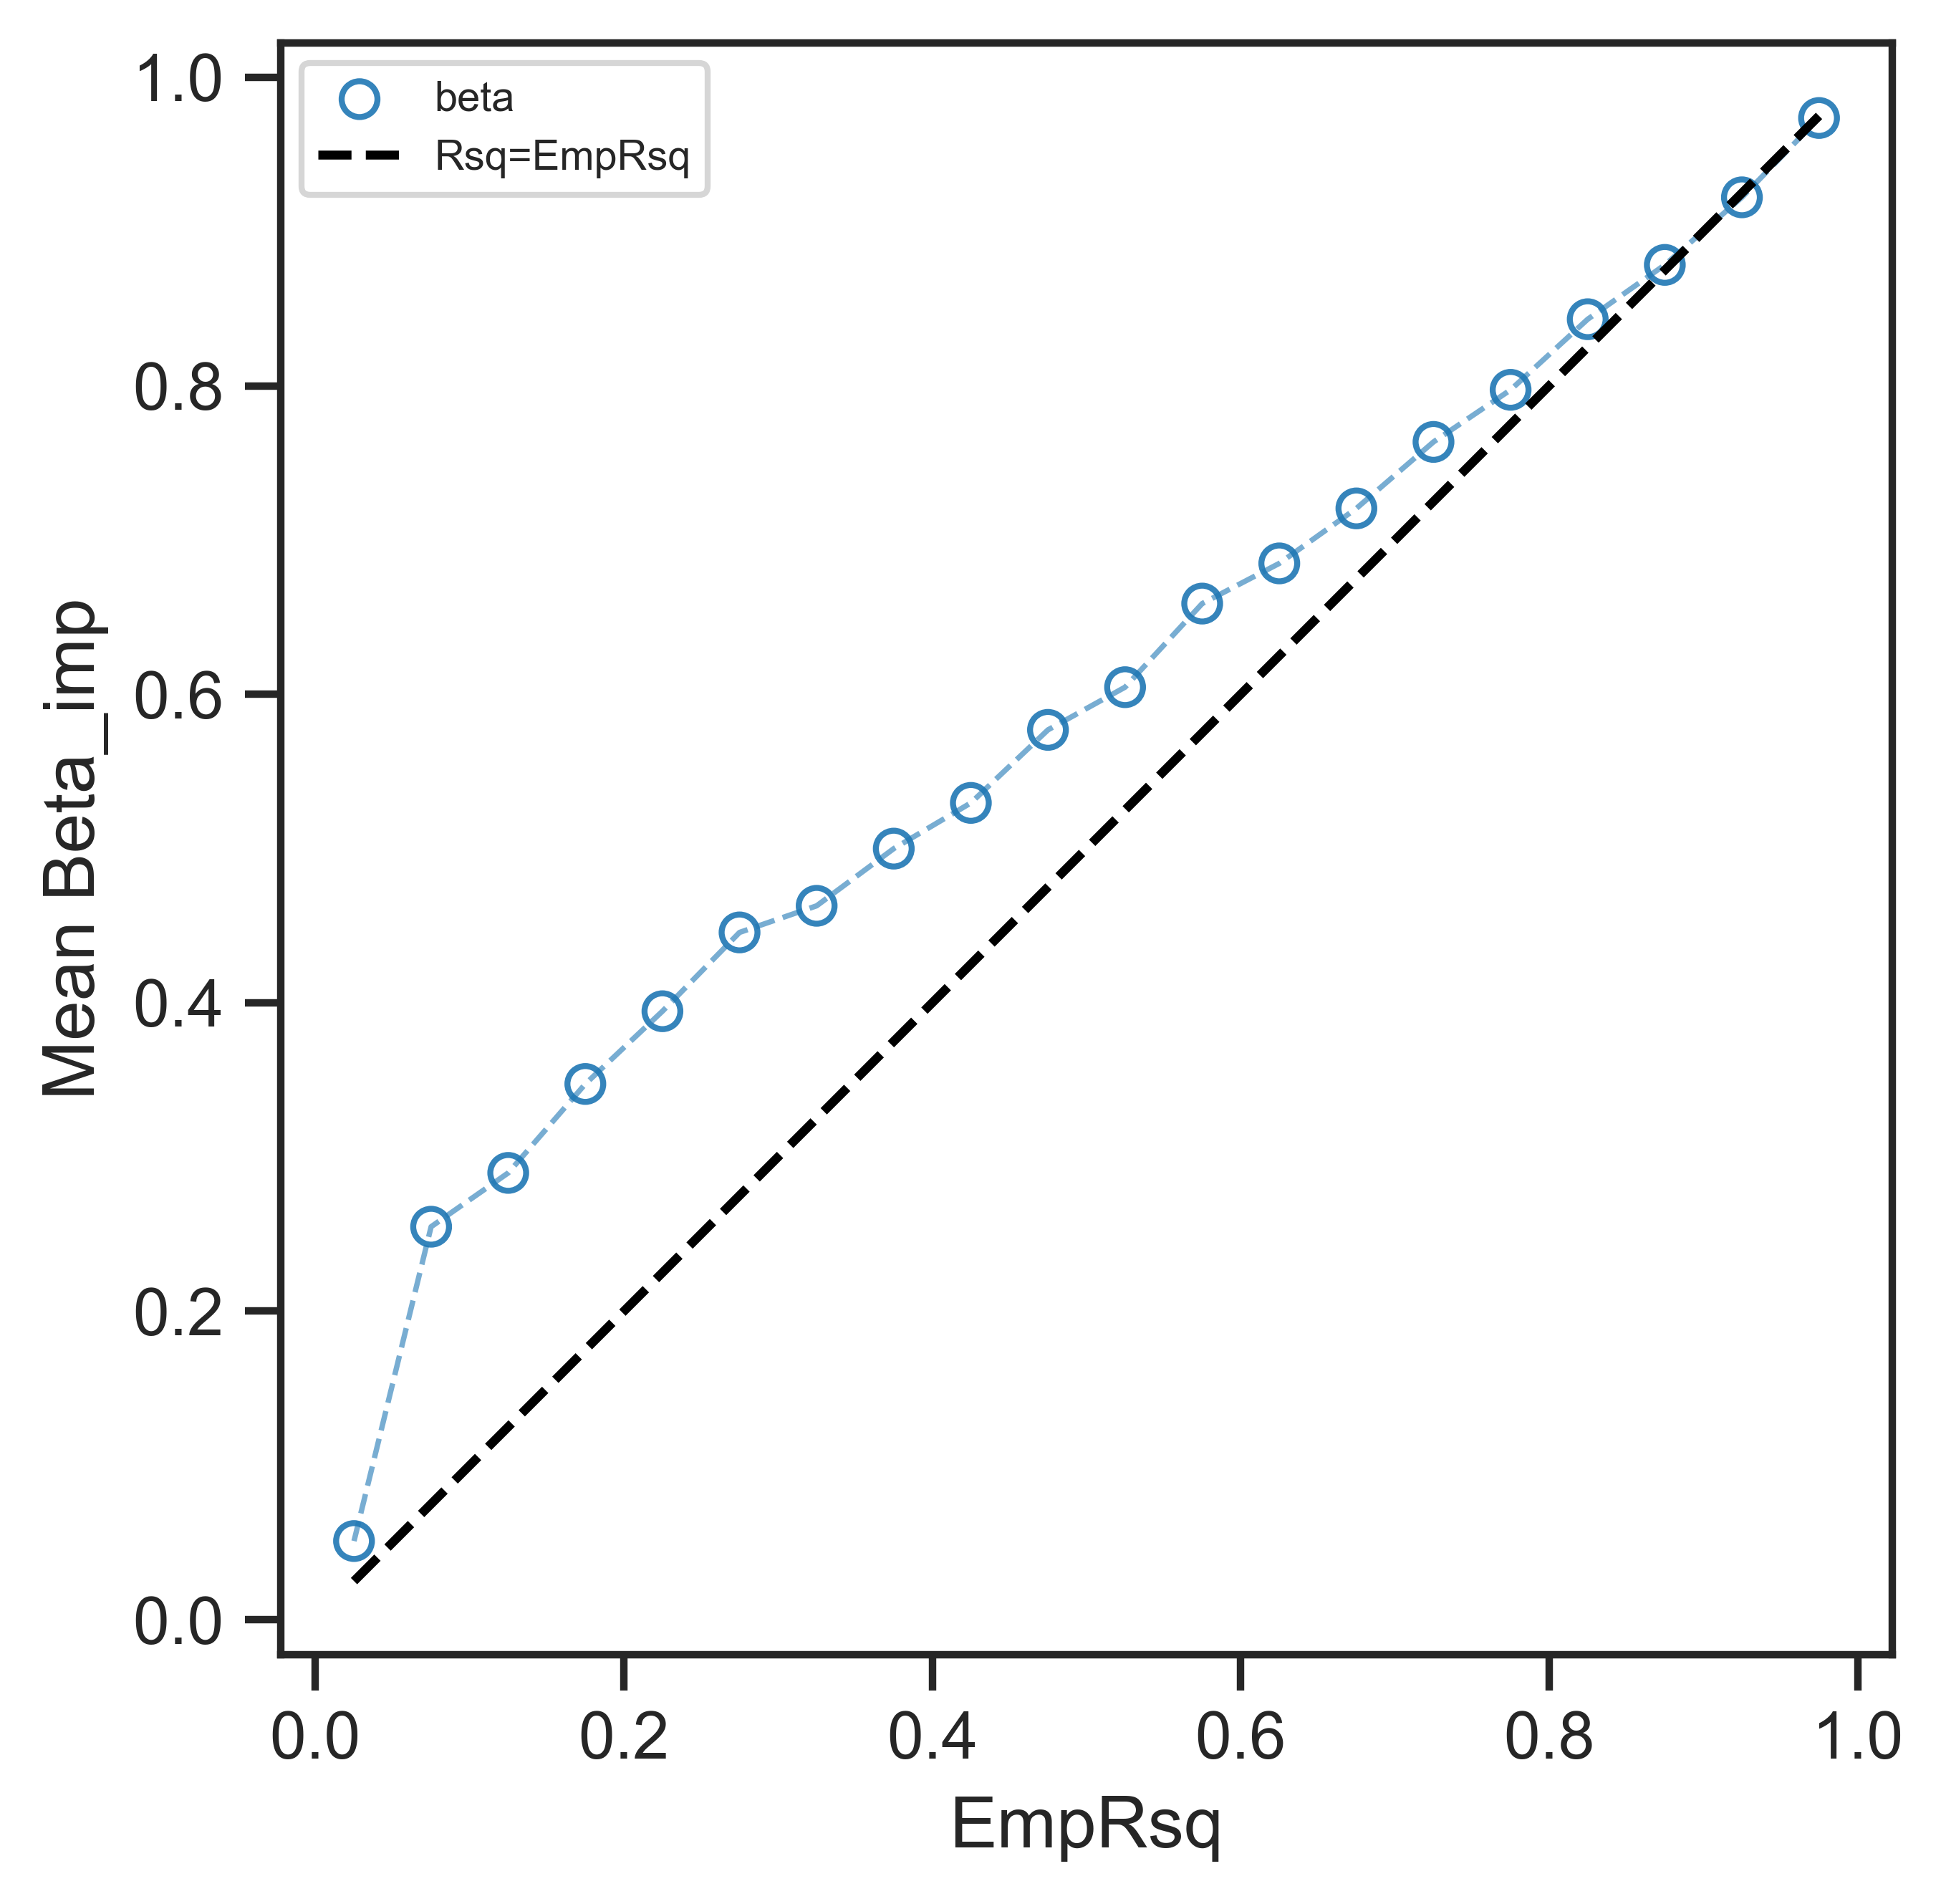

In [48]:
fig = plot_Beta(newdf, "beta", "EmpRsq", filename=None)

# Plot the intensity

/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'thres'
  **contour_kws,


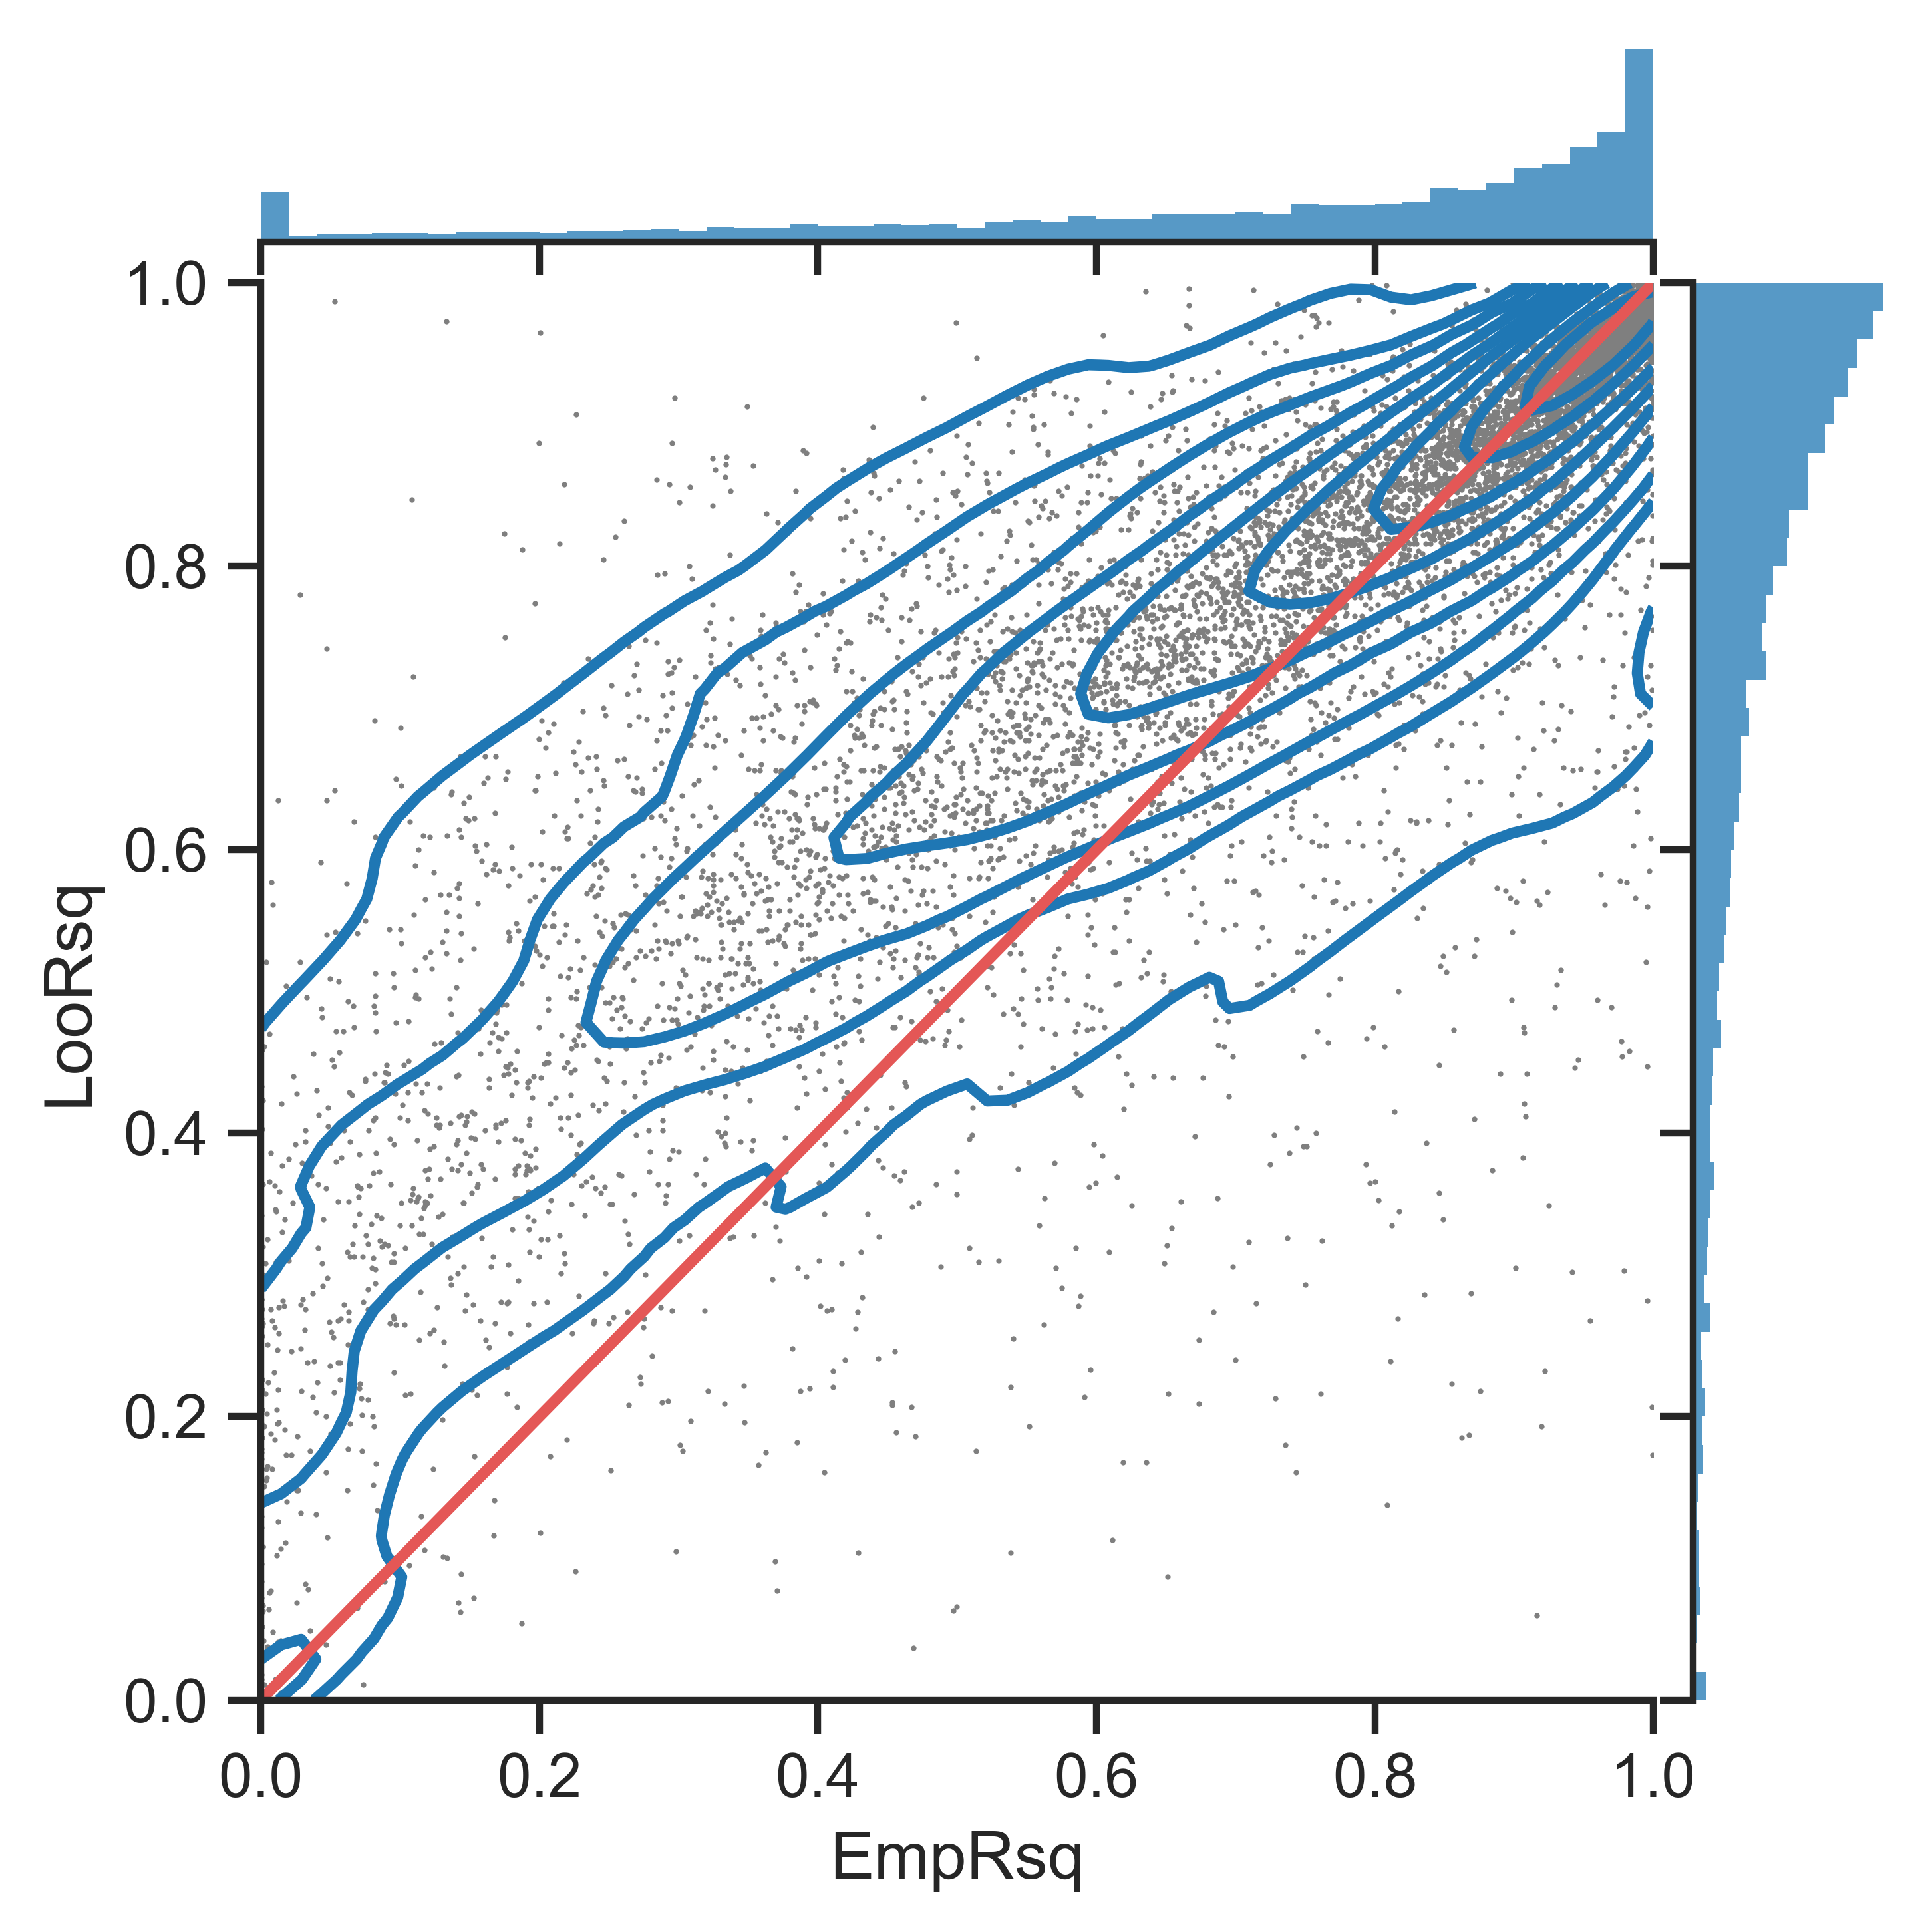

In [53]:
fig = plot_scatter("../data/chr19.info.gz", xcol="EmpRsq", ycol="LooRsq", xname=None, yname=None, filename=None, contour=True)

# Plot the Beta_imp contour

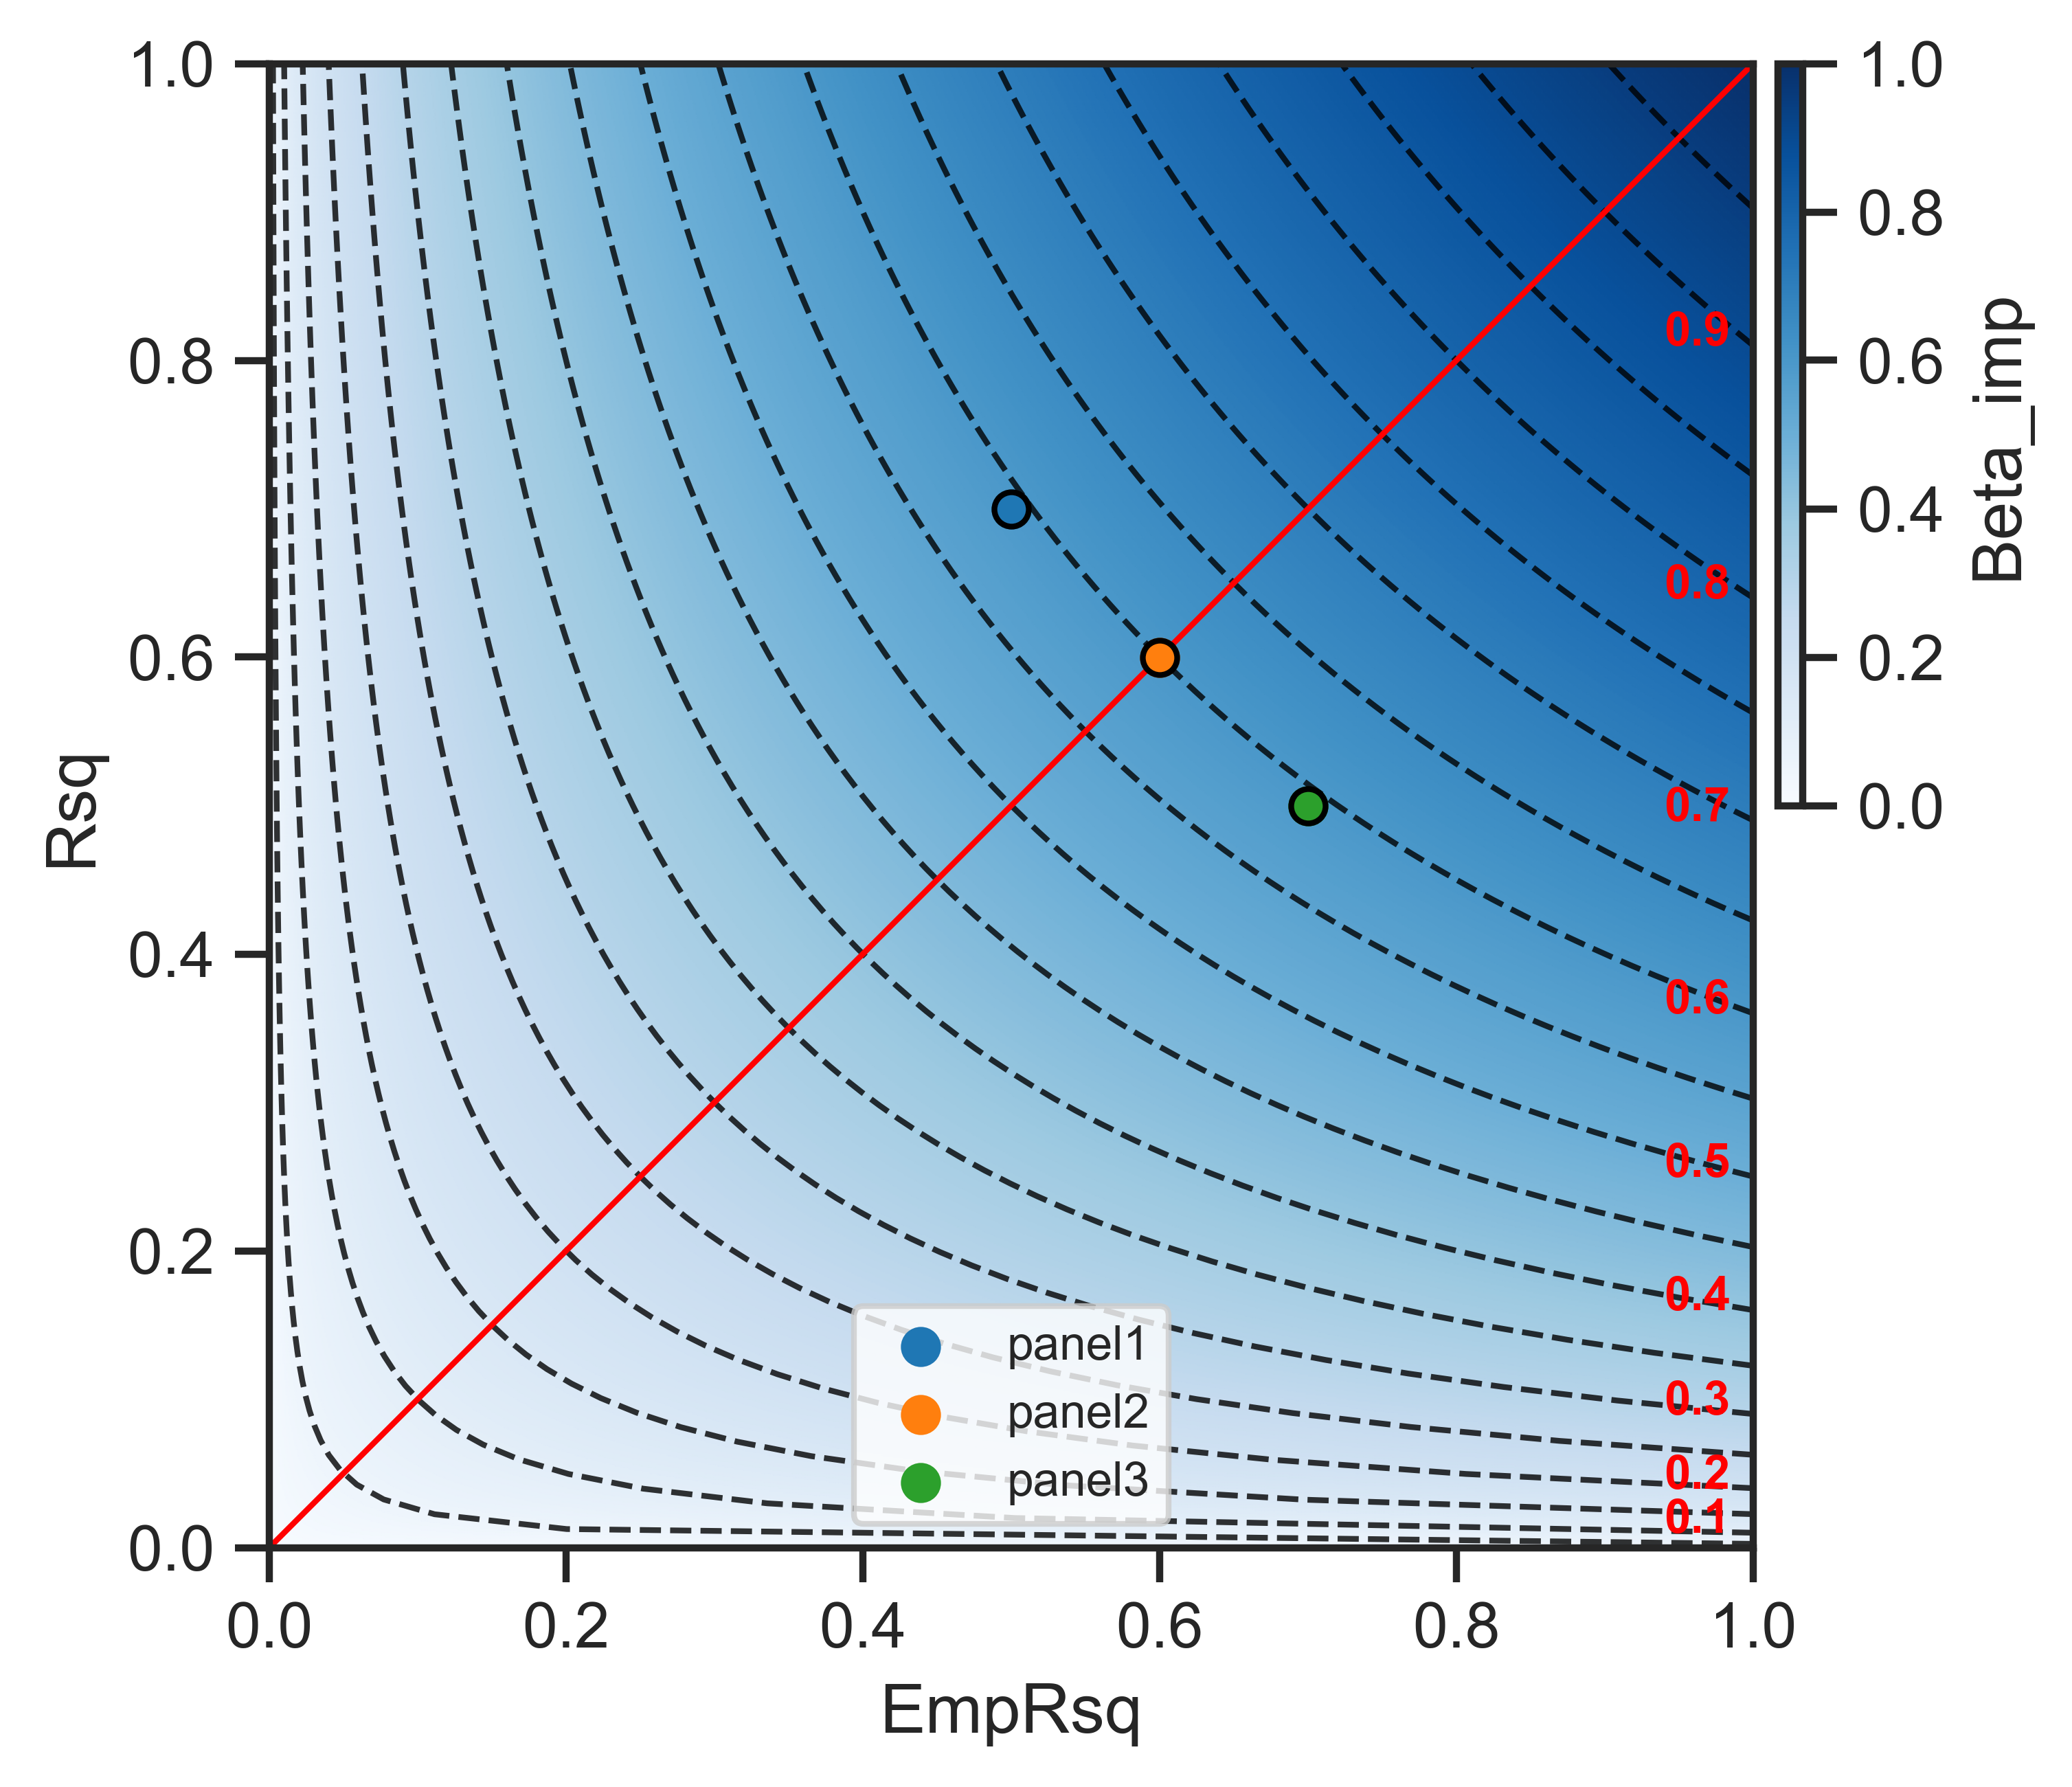

In [61]:
fig = beta_contour(rsq=[0.5, 0.6, 0.7], emprsq=[0.7, 0.6, 0.5], color_seq=None, domain_=["panel1","panel2","panel3"], 
add_label=True, filename=None)

# Plot the MARE contour

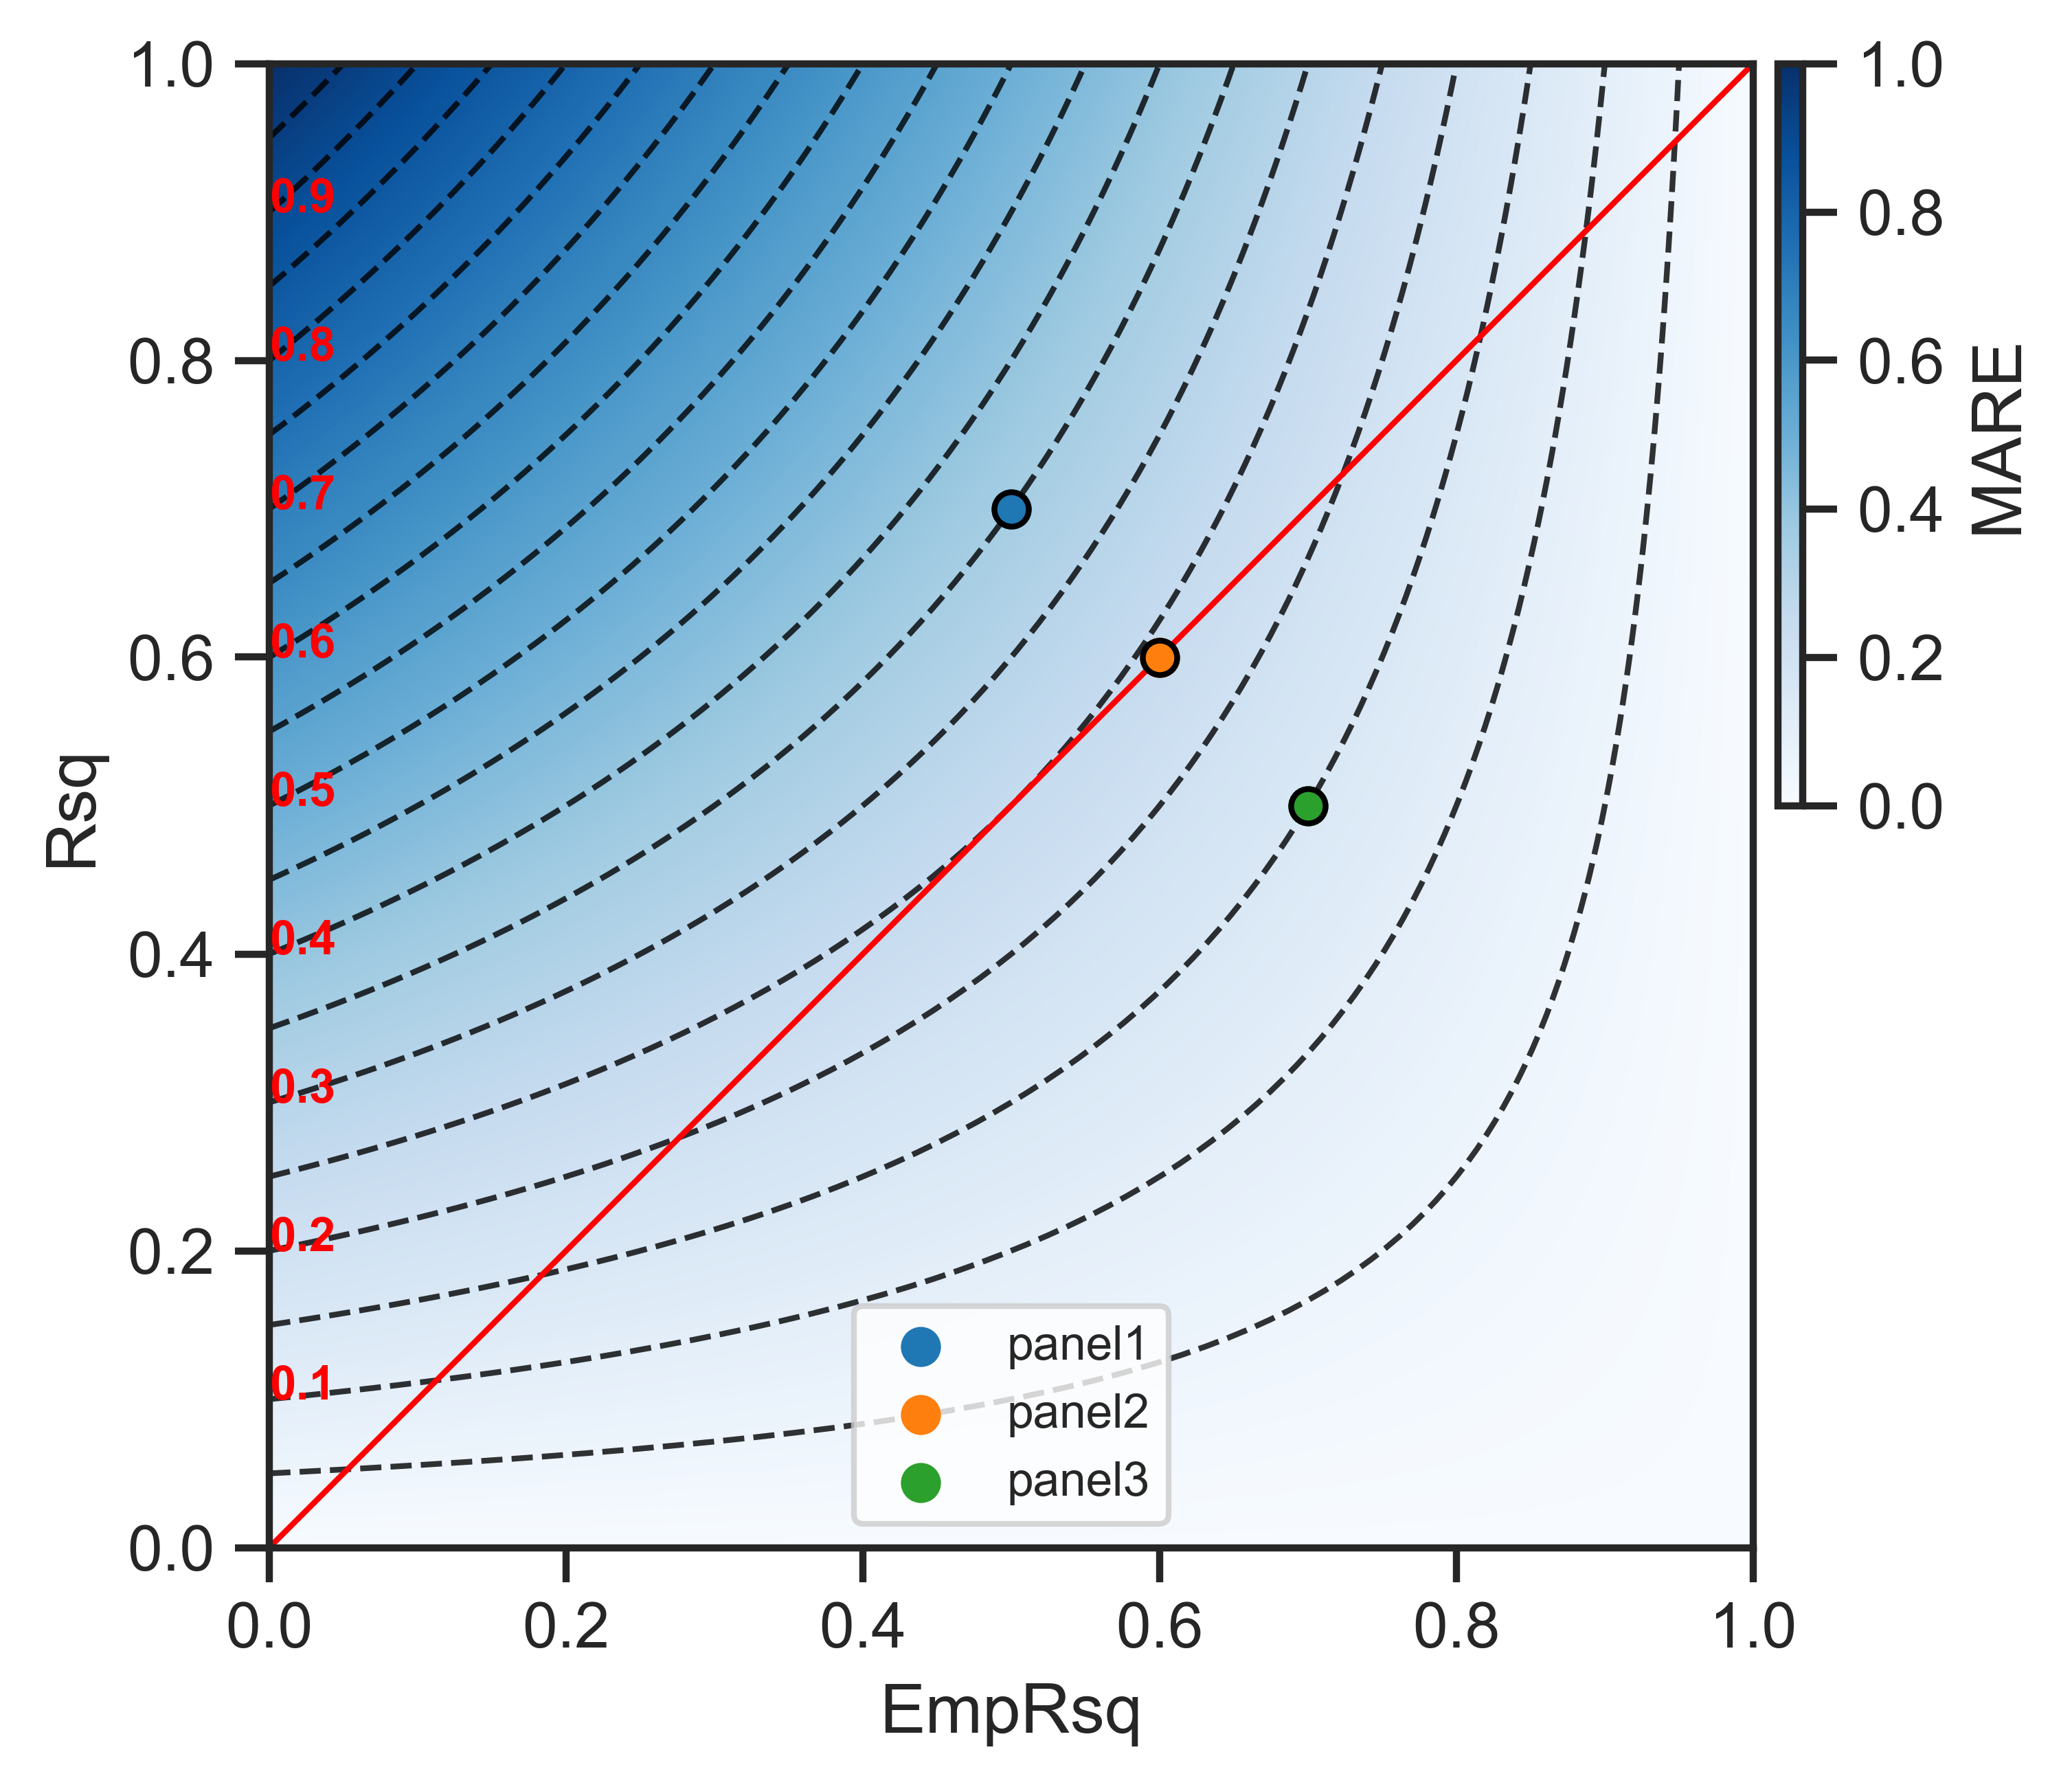

In [73]:
fig = mare_contour(rsq=[0.5, 0.6, 0.7], emprsq=[0.7, 0.6, 0.5], color_seq=None, domain_=["panel1","panel2","panel3"], 
add_label=True, filename=None)

# Swarm plot

## Diploid case

In [80]:
ds_ = pd.read_table("../data/rs671_ds_true_gt.txt").iloc[:500, :]

In [79]:
ds_.dtypes

t    float64
b    float64
j    float64
k    float64
0    float64
dtype: object

/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


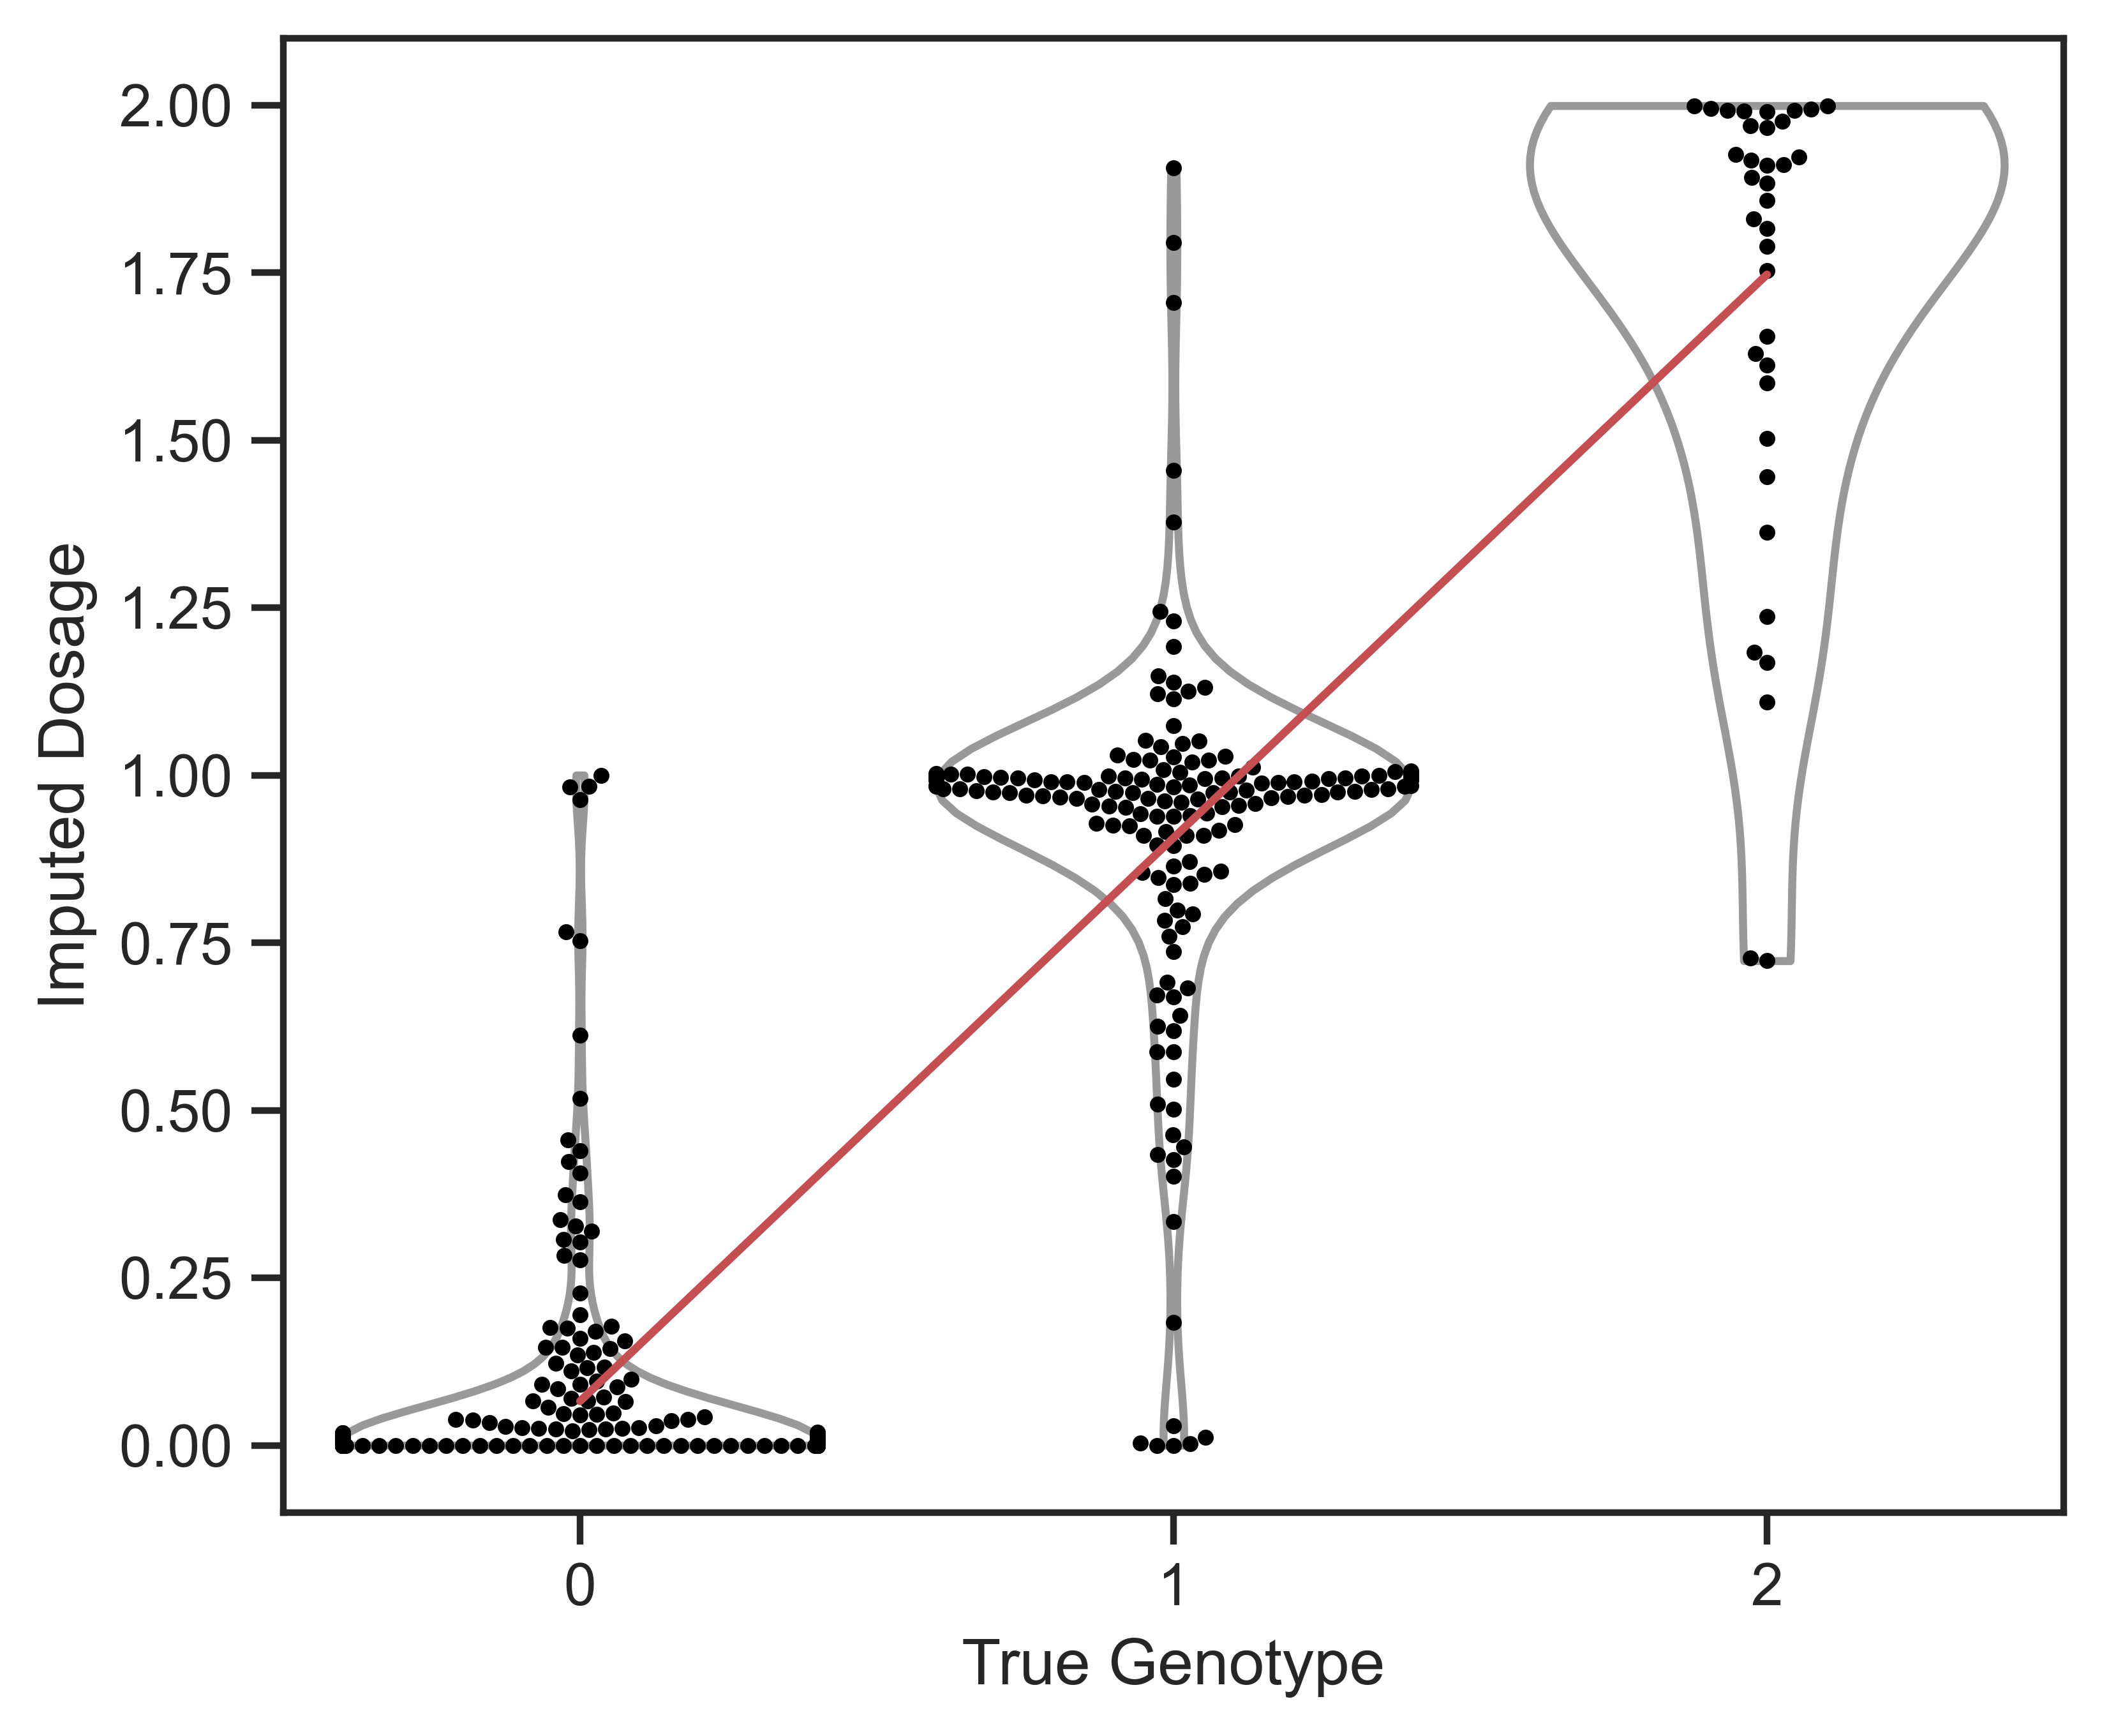

In [83]:
fig = plot_swarm_dip(ds_, "0", "t", filename=None)

## Haploid case

In [87]:
ds_ = pd.read_table("../data/rs10410162.19:36627790:T:C.dosage.txt").iloc[:500, :]

/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


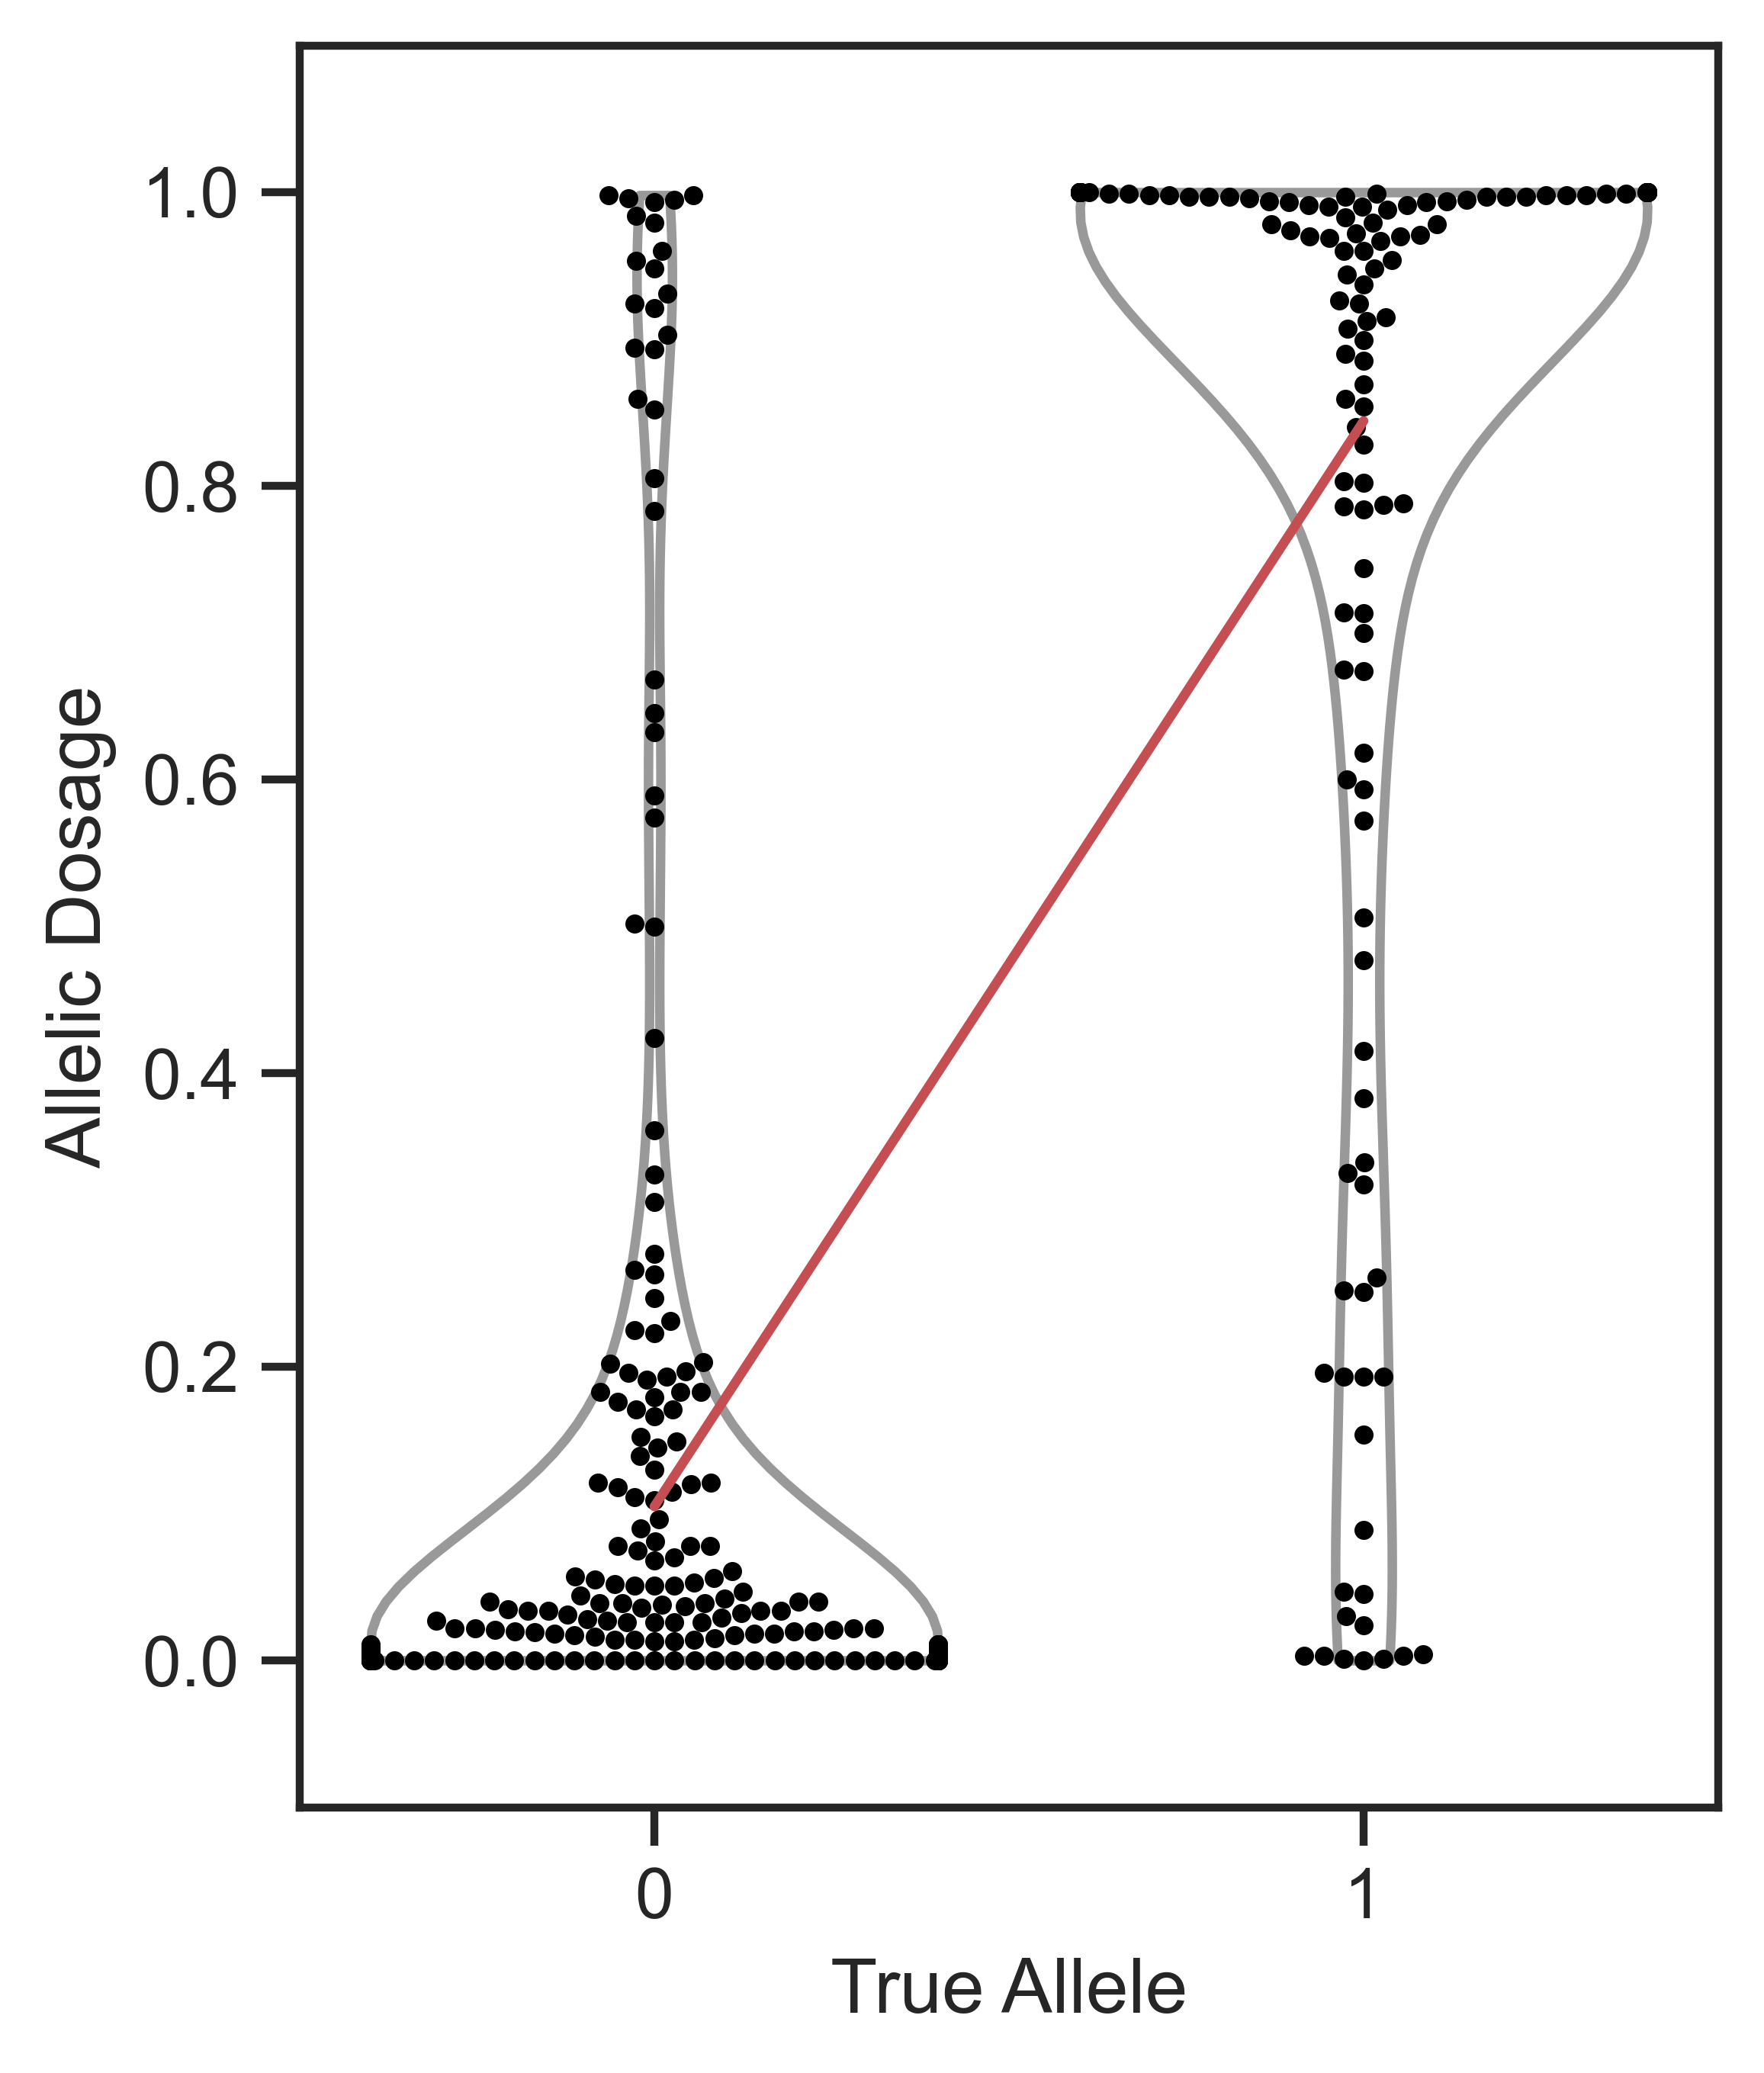

In [94]:
fig = plot_swarm_hap(ds_, "0", "1/10", filename=None)